Fashion-MNIST is a dataset of Zalando's fashion article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

“Fashion MNIST” dataset here is used for experimenting and practicing machine learning. Fashion-MNIST dataset is a collection of articles images provided by Zalando(https://zalando.com/) . Thanks to Zalando Research(https://github.com/zalandoresearch/fashion-mnist) for hosting the dataset. 

In [1]:
import pandas as pd
import gzip
import numpy as np

filePath_train_set = 'train-images-idx3-ubyte.gz'
filePath_train_label = 'train-labels-idx1-ubyte.gz'

filePath_test_set = 't10k-images-idx3-ubyte.gz'
filePath_test_label = 't10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

y_train

(60000, 784)
(60000,)
(10000, 784)
(10000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)


The class labels for Fashion MNIST are:
<br>
<br>
<b>Label</b> &nbsp;  <b>Description</b>
<br>
0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   T-shirt/top
<br>
1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Trouser
<br>
2   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Pullover
<br>
3   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Dress
<br>
4   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Coat
<br>
5   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sandal
<br>
6   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Shirt
<br>
7   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sneaker
<br>
8   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Bag
<br>
9   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Ankle boot
<br>

Our dataset consists of 60,000 images and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

Let us have a look at one instance (an article image) of this training dataset X_train.

To view a single instance(an article image),all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

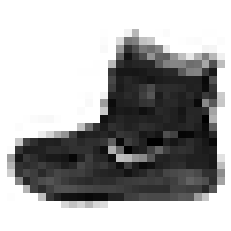

In [4]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
showImage(X_train[0])

In [5]:
y_train[0]

9

<b> Shuffling the training dataset - to get uniform samples for cross validation </b>
<br>
<br>
We need to <b>shuffle</b> our training data <b>to ensure that we don't miss out any digit in a cross validation fold</b>.

In [6]:
import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

After shuffling, let us see what is the image at X_train[0]

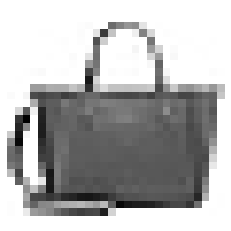

In [7]:
showImage(X_train[0])

<b> Feature Scaling </b>
<br>
<br>
Each image (instance) in the dataset has 784 pixels (features) and <b>value of each feature(pixel) ranges from 0 to 255, and this range is too wide </b>, hence we would need to use <b>feature scaling</b> here to apply <b>standardization</b> to this dataset X_train, so that all the values of each feature (pixel) is in a small range (based on the standard deviation value).
<br>
<br>
<b>  x_scaled = (x - x_mean) / standard deviation    </b>
<br>
<br>
    <b>Scaling is not needed for <i>Decision Tree</i> and <i>Random Forest</i> algorithms</b>
<br>
<br>

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [9]:
# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

Since, we have multiple classes (unique values - 0,1,2,...9) for the <i>label</i> in the target dataset y_train, its a <b>'multi-class' Classification problem</b>.

There are basically two strategies using which we can use multiple binary classifiers for multiclass classification. They are

    (1) One-versus-all (OvA) strategy also called one-versus-the-rest

    (2) One-versus-one (OvO) strategy

In OvA strategy, to create a system that can classify the digit images into 10 classes (from 0 to 9), we train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when we want to classify an image, we get the decision score from each classifier for that image and we select the class whose classifier outputs the highest score.


<b>We will use OvA strategy</b> for this multi-class Classification problem. When you try to use a 'Binary Classification Algorithm/Model(binary classifier)' for a multi-class classification problem using Scikit Learn, Scikit Learn by default uses OvA strategy internally.

Let us try <b>SGDClassifier</b> first

In [11]:
from sklearn.linear_model import SGDClassifier
# Let us train the model
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train_scaled, y_train)

C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(random_state=42)

In [12]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

Under the hood, Scikit-Learn actually trained <b>10 binary classifiers</b>, got their decision scores for the image, and selected the class with the <b>highest score</b>.

In [13]:
y_train[0]

8

Let us see the image at X_train[0] 

In [14]:
y_train_predict[0]

8

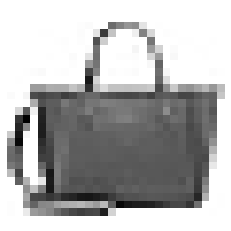

In [15]:
showImage(X_train[0])

In [16]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = sgd_clf.predict(X_train_scaled)

In [17]:
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)


SGD Accuracy:  0.8489
SGD Precision:  0.8493628950770987
SGD Recall:  0.8493628950770987
SGD F1 Score:  0.8487538349065629


Now, let us try <b>LogisticRegression</b>

Since this is <b>multi-class problem</b> (we need to predict multiple classes (0,1,2...9) for the given label), <b>hence we will use Softmax Regression</b>, which is nothing but Logistic Regression for 
multi-class classification problems

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)

C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [25]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

In [26]:
y_train[0]

8

Let us see the predicted class

In [27]:
y_train_predict[0]

8

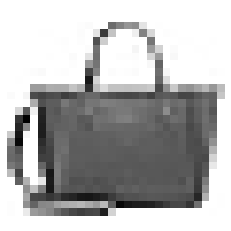

In [28]:
showImage(X_train[0])

In [29]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = log_clf.predict(X_train_scaled)

In [30]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.87755
Logistic Precision:  0.8766648092442357
Logistic Recall:  0.8766648092442357
Logistic F1 Score:  0.8769448048542856


Now, let us try <b>DecisionTreeClassifier</b>

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [33]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = dec_tree_clf.predict(X_train[0].reshape(1, -1))

In [34]:
y_train[0]

8

Let us see the predicted class

In [35]:
y_train_predict[0]

8

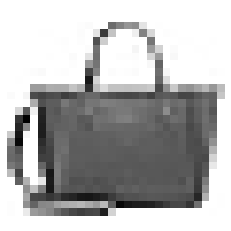

In [36]:
showImage(X_train[0])

In [37]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = dec_tree_clf.predict(X_train)

In [38]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


Now, let us try <b>RandomForestClassifier</b>

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

In [41]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [42]:
y_train[0]

8

Let us see the predicted class

In [43]:
y_train_predict[0]

8

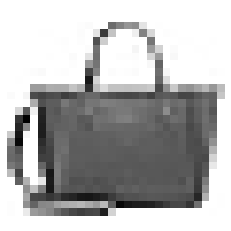

In [44]:
showImage(X_train[0])

In [45]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = rnd_clf.predict(X_train)

In [46]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  1.0
Random Forest Precision:  1.0
Random Forest Recall:  1.0
Random Forest F1 Score:  1.0


Now, let us try <b>Ensemble</b> with <b>soft voting</b>

In [47]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, y_train)

C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=50,
                                                     random_state=42))],
                 voting='soft')

In [48]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [49]:
y_train[0]

8

Let us see the predicted class

In [50]:
y_train_predict[0]

8

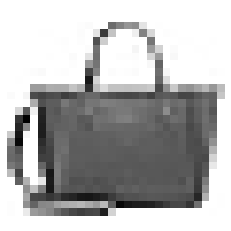

In [51]:
showImage(X_train[0])

In [52]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = voting_clf.predict(X_train_scaled)

In [53]:
voting_accuracy = accuracy_score(y_train, y_train_predict)
voting_precision = precision_score(y_train, y_train_predict, average='weighted')
voting_recall = recall_score(y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Ensemble Accuracy: ", voting_accuracy)
print("Ensemble Precision: ", voting_precision)
print("Ensemble Recall: ", voting_precision)
print("Ensemble F1 Score: ", voting_f1_score)

Ensemble Accuracy:  0.9653
Ensemble Precision:  0.9653631441482463
Ensemble Recall:  0.9653631441482463
Ensemble F1 Score:  0.9651755214917088


Now, let us try <b>XGBClassifier</b>

In [54]:
from xgboost import XGBClassifier

ImportError: cannot import name 'XGBClassifier' from 'xgboost' (unknown location)

In [ ]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training data set here
# For max_depth parameter, typical values are between 3 to 10. We have chosen 10
xgb_clf.fit(X_train, y_train)

In [ ]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = xgb_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0]

Let us see the predicted class

In [55]:
y_train_predict[0]

8

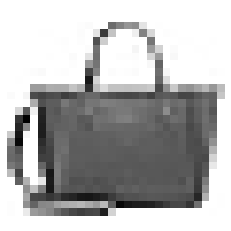

In [56]:
showImage(X_train[0])

In [57]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = xgb_clf.predict(X_train)

NameError: name 'xgb_clf' is not defined

In [ ]:
xgb_accuracy = accuracy_score(y_train, y_train_predict)
xgb_precision = precision_score(y_train, y_train_predict, average='weighted')
xgb_recall = recall_score(y_train, y_train_predict, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)
print("XGBoost Precision: ", xgb_precision)
print("XGBoost Recall: ", xgb_precision)
print("XGBoost F1 Score: ", xgb_f1_score)

<b>Calculating Performance Measures like - Accuracy, Precision, Recall, etc.</b>
<br>
<br>

Now, let us use <b>cross validation</b> to find the proper score of each model, also to ensure that the model is not <i>overfitting</i> or <i>underfitting</i>. 
<br>
<br>
<b>NOTE:</b>
<br>
<b>If the cross validation score values for a performance measure (say accuracy) are not varying significantly for various folds (k-folds) then</b> we can say that the <b>model is not overfitting</b>.
<br>
<b>If the cross validation score values for a performance measure (say accuracy) are not very low for various folds (k-folds) then</b> we can say that the <b>model is not underfitting</b>.
<br>
<br>
We will perform k-fold cross-validation
<br>
Will randomly split the training set into 3 distinct subsets called folds (cv=3). Since cross validation is 
a computing intensive and time consuming process, we are limiting 'cv' (no. of folds) to 3 instead of normally 10 folds.
<br>
Then will train and evaluate each model 3 times by picking a different fold 
for evaluation every time and training on the other 2 folds
<br>
The result will be an array containing the 3 evaluation scores for each of the measures - accuracy, precision, F1 score.
<br>
We will use <b>cross_val_score()</b> function to calculate <b>accuracy</b>
<br>
 <b>But accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.</b>
 <br>
A dataset is said to be skewed when some classes are much more frequent than others.
<br>
Even if the current training dataset may not be skewed, the future test dataset (live) on which the model runs
can be skewed, hence, <b>considering we may get skewed dataset in future, let us calculate Precision, Recall and F1 score also for the models.</b>
<br>
And will use <b>cross_val_predict()</b> function to create <b>confusion matrix</b> to calculate <b>Precision, Recall and F1 score</b>
<br>


In [ ]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Let us <b>calculate accuracy, precision, recall, F1 score for SGDClassifier</b>

In [ ]:
sgd_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(sgd_scores)
sgd_accuracy = sgd_scores.mean()

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
sgd_precision = precision_score(y_train, y_train_pred, average='weighted')
sgd_recall = recall_score(y_train, y_train_pred, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("SGD CV Accuracy: ", sgd_accuracy)
print("SGD CV Precision: ", sgd_precision)
print("SGD CV Recall: ", sgd_precision)
print("SGD CV F1 Score: ", sgd_f1_score)

As we can see from above, <b>SGDClassifier gives accuracy of 83.35% (standrad deviation = 0.0020), precision, recall and F1 score of 83.19%</b>.

Let us <b>calculate accuracy, precision, recall, F1 Score for Softmax Regression</b>

In [ ]:
log_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_scores)
log_accuracy = log_scores.mean()

y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
log_precision = precision_score(y_train, y_train_pred, average='weighted')
log_recall = recall_score(y_train, y_train_pred, average='weighted')
log_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Logistic CV Accuracy: ", log_accuracy)
print("Logistic CV Precision: ", log_precision)
print("Logistic CV Recall: ", log_precision)
print("Logistic CV F1 Score: ", log_f1_score)

As we can see from above, <b>Softmax Regression</b> (with parameters - multi_class="multinomial", solver="lbfgs" and C=10) <b>gives accuracy of 84.70% (standrad deviation = 0.0022), precision, recall and F1 score of 84.58%</b>.

Let us <b>calculate accuracy, precision, recall, F1 Score for DecisionTreeClassifier</b>

In [ ]:
# Scaled Features not required for Decision Tree
dec_tree_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(dec_tree_scores)
dec_tree_accuracy = dec_tree_scores.mean()

y_train_pred = cross_val_predict(dec_tree_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
dec_tree_precision = precision_score(y_train, y_train_pred, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_pred, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Decision Tree CV Accuracy: ", dec_tree_accuracy)
print("Decision Tree CV Precision: ", dec_tree_precision)
print("Decision Tree CV Recall: ", dec_tree_precision)
print("Decision Tree CV F1 Score: ", dec_tree_f1_score)

As we can see from above, <b>Decision Tree Classifier</b> (with parameter - max_depth=50) <b>gives accuracy of 78.94% (standrad deviation = 0.0016), precision, recall and F1 score of 78.94%</b>.

Let us <b>calculate accuracy, precision, recall, F1 score for RandomForestClassifier</b>

In [ ]:
# Scaled features not required for Random Forest (as it is based on Decision Trees)

def calculateRandomForestScores():
    rnd_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
    display_scores(rnd_scores)
    rnd_accuracy = rnd_scores.mean()

    y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
    confusion_matrix(y_train, y_train_pred)
    rnd_precision = precision_score(y_train, y_train_pred, average='weighted')
    rnd_recall = recall_score(y_train, y_train_pred, average='weighted')
    rnd_f1_score = f1_score(y_train, y_train_pred, average='weighted')

    print("Random Forest CV Accuracy: ", rnd_accuracy)
    print("Random Forest CV Precision: ", rnd_precision)
    print("Random Forest CV Recall: ", rnd_precision)
    print("Random Forest CV F1 Score: ", rnd_f1_score)

In [ ]:
calculateRandomForestScores()

As we can see from above, <b>Random Forest Classifier</b> (with parameters - no. of estimators=100 and max_depth=50) <b>gives accuracy of 88.05% (standard deviation = 0.0023), precision, recall and F1 score of 87.95%</b>.

Let us <b>calculate accuracy, precision, recall, F1 score for Ensemble (Voting Classifier)</b>

In [ ]:
def calculateEnsembleScores():
    voting_scores = cross_val_score(voting_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
    display_scores(voting_scores)
    voting_accuracy = voting_scores.mean()

    y_train_pred = cross_val_predict(voting_clf, X_train_scaled, y_train, cv=3)
    confusion_matrix(y_train, y_train_pred)
    voting_precision = precision_score(y_train, y_train_pred, average='weighted')
    voting_recall = recall_score(y_train, y_train_pred, average='weighted')
    voting_f1_score = f1_score(y_train, y_train_pred, average='weighted')

    print("Ensemble CV Accuracy: ", voting_accuracy)
    print("Ensemble CV Precision: ", voting_precision)
    print("Ensemble CV Recall: ", voting_precision)
    print("Ensemble CV F1 Score: ", voting_f1_score)
    
calculateEnsembleScores()

As we can see from above, <b>Ensemble</b> (of Softmax Regression and Random Forest) <b>with soft voting and no. of estimators as 100 and max_depth as 50</b>, we are getting <b>accuracy of 87.14%, and precision, recall and F1 score of 87%</b>.
<br>
<br>
<br>
Let us <b>try Ensemble with lesser no. of estimators and max_depth (no. of estimators = 20, max_depth=10)</b>, and see the results
<br>

In [ ]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, y_train)

In [ ]:
calculateEnsembleScores()

As we can see from above, <b>Ensemble</b> (of Softmax Regression and Random Forest with soft voting) <b>with no. of estimators as 20 and max_depth as 10</b> gives <b>accuracy of 86.36% (standrad deviation = 0.0026), precision, recall and F1 score of 86.19%</b>. 
<br>
<br>
Earlier, for the same <b>Ensemble with no. of estimators as 100 and max_depth as 50</b> we got <b>accuracy of 87.14% (standard deviation = 0.0026), and precision, recall and F1 score of 87%</b>. 
<br>
<br>
We see that, <b>for the same Ensemble, by increasing the no. of estimators and max_depth, we are getting better scores</b>. 
<br>
<br>
<b>Hence, probably, by adding some more algorithms (models) to the Ensemble, and by trying tuning a few more parameter values, we may be able to improve the scores further</b>.
<br>

<br>
<b>Up to this point, we see that, Random Forest has performed better than all other algorithms(including Ensemble) that we used so far</b>.
<br>
<br>
<b>Now, let us compare Random Forest with XGBoost</b>
<br>
<br>

Let us <b>calculate accuracy, precision, recall, F1 Score for XGBClassifier</b>

In [ ]:
# Scaled features not required for XGBoost (as it is based on Decision Trees)
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(xgb_scores)
xgb_accuracy = xgb_scores.mean()

y_train_pred = cross_val_predict(xgb_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
xgb_precision = precision_score(y_train, y_train_pred, average='weighted')
xgb_recall = recall_score(y_train, y_train_pred, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("XGBoost CV Accuracy: ", xgb_accuracy)
print("XGBoost CV Precision: ", xgb_precision)
print("XGBoost CV Recall: ", xgb_precision)
print("XGBoost CV F1 Score: ", xgb_f1_score)

As we can see from above, <b>XGBoost Classifier</b> (with parameters - no. of estimators=20 and max_depth=10) <b>gives accuracy of 87.62% (standard deviation = 0.00063), precision, recall and F1 score of 87.53%</b>.

Now, <b>let us compare the XGBoost scores with that of Random Forest for the same set of parameter values (no. of estimators=20 and max_depth=10)</b>.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, y_train)

In [ ]:
calculateRandomForestScores()

As we can see, for the same set of parameter values (n_estimators=20, max_depth=10), <b>scores of XGBoost are better than that of Random Forest</b>.
<br>
<br>
<b>Random Forest:</b>
<br>
<b>Accuracy: 84.82 </b>
<br>
Standard Deviation: 0.0024
<br>
<b>Precision, Recall, F1 Score: 84.82</b>
<br>  
<br>
<b>XGBoost:</b>
<br>
<b>Accuracy: 87.62 </b>
<br>
Standard Deviation: 0.00063
<br>
<b>Precision, Recall, F1 Score: 87.53 </b>
<br>  
<br>

<b>Finally, we conclude that XGBoost performance is the best for this problem, hence, we select XGBoost as our final model and will proceed with fine-tuning the same</b>.
<br>

Grid search takes a lot of time on large datasets. Let us <b>apply Dimensionality Reduction</b> to the training dataset to reduce the number of features in the dataset, <b> so that the time taken for grid search and prediction is reduced</b>. Also, we will calculate the scores based on the <i>reduced</i> features.
<br>
<br>
<b>Let us see, if dimensionality reduction leads to any significant loss of information from the images in our training dataset.</b>
<br>
<br>
If we get a significant loss of information with dimensionality reduction, we will not use dimensionality reduction for our training dataset (and hence the problem).
<br>
<br>


Our dataset is not like a swiss-roll, therefore, we don't need to convert a 3-dimensional dataset to 2-dimensional plane, etc. 
<br>
Hence, we won't be using <i>Manifold</i> technique for dimensionality reduction here.
<br>
<br>
We will be using <b><i>Projection</i> technique for dimensionality reduction</b> for our problem.
<br>
<br>

In [ ]:
# We will use Scikit Learn's PCA class which uses SVD 
# (Singular Value Decomposition) internally and also the projection

from sklearn.decomposition import PCA

# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# Hence, I have selected n_components=0.99, which gives 459 features (out of original 784) 
# and there is no significant loss of information (quality) in the 'recovered' images 

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

In [ ]:
# Checking if hit your 99% minimum?
np.sum(pca.explained_variance_ratio_)

The X_train_reduced dataset that we got after applying dimensionality reduction is called <i>compressed dataset</i> (X_train_reduced).
<br>
Now, to check, if there was any significant information (data) loss for each image of X_train_reduced (that we got after dimensionality reduction), due to compression, as compared to original dataset X_train, let us recover one of the images from X_train_reduced dataset by decompressing (applying <i>inverse</i>) it and compare this <i>recovered</i> image (decompressed image) with its corresponding <i>original</i> image (from X_train).
<br>
<br>
Let us recover (decompress) one of the images (instance) of X_train_reduced

In [ ]:
# use inverse_transform to decompress back to 784 dimensions

X_train_recovered = pca.inverse_transform(X_train_reduced)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

<br>
<b>Fine-tuning the selected XGBoost classifier model</b>
<br>

<br>
<b>By applying dimensionality reduction (with variance ratio of 0.99 i.e. n_components=0.99), we don't get any significant loss of information(quality) in the resulting X_train_reduced dataset. Hence, we will use the X_train_reduced (dimensionally reduced dataset) for grid search</b>
<br>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try (1x3)=3 combinations of hyperparameters
    {'n_estimators': [20], 'max_depth': [8, 10, 12]},
    
]

xgb_clf_grid_search = XGBClassifier(random_state=42)
# train across 3 folds, that's a total of 3x3=9 rounds of training 
grid_search = GridSearchCV(xgb_clf_grid_search, param_grid, cv=3,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_reduced, y_train)

In [ ]:
# The best hyperparameter combinations

grid_search.best_params_

In [ ]:
# Get the best estimator

grid_search.best_estimator_

In [ ]:
# Let's look at the score of each hyperparameter combination used during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

<br>
<br>
Now, let us <b>evaluate our selected XGBoost model, using best parameters, on the test dataset</b>
<br>

<br>
<b>If you don't get significant loss of information by applying dimensionality reduction on training dataset, then apply dimensionality reduction on your test dataset(X_test) to get X_test_reduced dataset (dimensionally reduced dataset) and use the X_test_reduced (dimensionally reduced dataset) for evaluating the model on test dataset (X_test_reduced), else, use original test dataset X_test for evaluating the model on test dataset </b>
<br>

In [ ]:
# Evaluate model on the test Set

final_model = grid_search.best_estimator_

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Remember, you have to use pca object of training dataset (you got on training dataset during dimensionality reduction)
# and only apply transform on test dataset (not fit_transform) - highly important

X_test_reduced = pca.transform(X_test)


y_test_predict = final_model.predict(X_test_reduced)


confusion_matrix(y_test, y_test_predict)
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_precision)
print("Final F1 Score: ", final_f1_score)


In [ ]:
y_test[0]

In [ ]:
y_test_predict[0]

In [ ]:
showImage(X_test[0])